In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/data.csv')
data['CAT_GAMBLING'] = data['CAT_GAMBLING'].map({'No': 0, 'High': 2, 'Low': 1})
original_features = ['INCOME', 'SAVINGS', 'DEBT', 'T_CLOTHING_12', 'T_CLOTHING_6',
       'T_EDUCATION_12', 'T_EDUCATION_6', 
       'T_ENTERTAINMENT_12', 'T_ENTERTAINMENT_6', 'T_FINES_12', 'T_FINES_6', 
       'T_GAMBLING_12', 'T_GAMBLING_6', 'T_GROCERIES_12', 'T_GROCERIES_6', 
       'T_HEALTH_12', 'T_HEALTH_6', 'T_HOUSING_12', 'T_HOUSING_6',
       'T_TAX_12', 'T_TAX_6',
       'T_TRAVEL_12', 'T_TRAVEL_6', 
       'T_UTILITIES_12', 'T_UTILITIES_6', 
       'T_EXPENDITURE_12', 'T_EXPENDITURE_6', 'CAT_GAMBLING',
       'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE', 'CAT_SAVINGS_ACCOUNT',
       'CAT_DEPENDENTS', 'DEFAULT']
data = data[original_features]

In [206]:
#data = data.drop(['CAT_DEPENDENTS', 'CAT_MORTGAGE', 'CAT_GAMBLING', 'CAT_SAVINGS_ACCOUNT', 'CAT_DEBT'], axis=1)

In [207]:
#create column r_debt_income, which is the ratio of debt to income, if income!=0, else 0
data['INCOME']+=1
data['R_DEBT_INCOME'] = data['DEBT'] / data['INCOME']

In [208]:
cor_matrix = data.corr().style.background_gradient(cmap='coolwarm').set_precision(4)
cor_matrix


/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_55049/2707594953.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cor_matrix = data.corr().style.background_gradient(cmap='coolwarm').set_precision(4)


,INCOME,SAVINGS,DEBT,T_CLOTHING_12,T_CLOTHING_6,T_EDUCATION_12,T_EDUCATION_6,T_ENTERTAINMENT_12,T_ENTERTAINMENT_6,T_FINES_12,T_FINES_6,T_GAMBLING_12,T_GAMBLING_6,T_GROCERIES_12,T_GROCERIES_6,T_HEALTH_12,T_HEALTH_6,T_HOUSING_12,T_HOUSING_6,T_TAX_12,T_TAX_6,T_TRAVEL_12,T_TRAVEL_6,T_UTILITIES_12,T_UTILITIES_6,T_EXPENDITURE_12,T_EXPENDITURE_6,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,DEFAULT,R_DEBT_INCOME
INCOME,1.0000,0.6355,0.7679,0.7598,0.6338,0.3401,0.3401,0.7443,0.7049,0.1084,0.0937,0.4310,0.4310,0.7516,0.7485,0.7675,0.6274,0.5704,0.5704,0.9005,0.8961,0.8450,0.7646,0.8975,0.8976,0.9853,0.9575,0.2495,0.2378,0.5192,0.3832,0.0840,0.2107,0.0264,-0.1943
SAVINGS,0.6355,1.0000,0.5241,0.3341,0.2871,0.3705,0.3707,0.2296,0.2254,0.0333,0.0238,0.1156,0.1175,0.7752,0.7672,0.6719,0.5548,0.5389,0.5389,0.4796,0.4764,0.4673,0.4295,0.6965,0.6964,0.6705,0.6492,0.1754,0.2157,0.3339,0.3833,0.0895,0.5321,-0.0178,-0.1568
DEBT,0.7679,0.5241,1.0000,0.5278,0.4308,0.3782,0.3781,0.4790,0.4621,0.0636,0.1008,0.3077,0.3057,0.7204,0.7089,0.5844,0.4665,0.4814,0.4814,0.6913,0.6859,0.5988,0.5332,0.7590,0.7592,0.7718,0.7406,0.2693,0.1991,0.6596,0.3238,0.0420,0.3701,0.1222,-0.1308
T_CLOTHING_12,0.7598,0.3341,0.5278,1.0000,0.9115,0.1677,0.1677,0.7295,0.6792,0.0991,0.0607,0.3546,0.3588,0.4831,0.5053,0.6261,0.5927,0.3071,0.3071,0.7307,0.7288,0.6502,0.6393,0.6406,0.6408,0.7611,0.7833,0.1519,0.2136,0.3645,0.1811,0.0748,-0.0099,0.0340,-0.1653
T_CLOTHING_6,0.6338,0.2871,0.4308,0.9115,1.0000,0.1484,0.1484,0.5401,0.5015,0.0524,0.0148,0.2575,0.2656,0.4064,0.4501,0.6028,0.6433,0.2488,0.2488,0.5540,0.5537,0.5747,0.6288,0.4902,0.4905,0.6409,0.7180,0.1079,0.1612,0.3071,0.1567,0.0564,-0.0007,0.0546,-0.1233
T_EDUCATION_12,0.3401,0.3705,0.3782,0.1677,0.1484,1.0000,1.0000,0.0440,0.0426,0.0591,0.0759,0.0085,0.0107,0.5667,0.5589,0.2588,0.2026,0.2280,0.2280,0.2138,0.2162,0.1621,0.1527,0.4007,0.4008,0.3897,0.3718,0.1011,0.1189,0.2566,0.1688,0.0174,0.5544,-0.0095,-0.0947
T_EDUCATION_6,0.3401,0.3707,0.3781,0.1677,0.1484,1.0000,1.0000,0.0440,0.0426,0.0589,0.0755,0.0085,0.0108,0.5668,0.5590,0.2590,0.2028,0.2280,0.2280,0.2139,0.2163,0.1619,0.1526,0.4008,0.4009,0.3898,0.3718,0.1011,0.1189,0.2565,0.1688,0.0175,0.5546,-0.0096,-0.0947
T_ENTERTAINMENT_12,0.7443,0.2296,0.4790,0.7295,0.5401,0.0440,0.0440,1.0000,0.9828,0.1132,0.0901,0.4775,0.4723,0.3337,0.3226,0.5048,0.3673,0.2597,0.2597,0.8161,0.8139,0.6456,0.5281,0.6411,0.6411,0.7270,0.6808,0.1530,0.1824,0.3620,0.1799,0.0764,-0.2356,-0.0211,-0.2069
T_ENTERTAINMENT_6,0.7049,0.2254,0.4621,0.6792,0.5015,0.0426,0.0426,0.9828,1.0000,0.0946,0.0789,0.4351,0.4290,0.3224,0.3128,0.4829,0.3514,0.2419,0.2419,0.7705,0.7688,0.6126,0.5007,0.6076,0.6075,0.6928,0.6543,0.1366,0.1722,0.3536,0.1682,0.0684,-0.2156,-0.0149,-0.1946
T_FINES_12,0.1084,0.0333,0.0636,0.0991,0.0524,0.0591,0.0589,0.1132,0.0946,1.0000,0.8235,0.1344,0.1309,0.0645,0.0636,0.0491,0.0121,-0.0322,-0.0322,0.1085,0.0971,0.1058,0.0684,0.0943,0.0944,0.1022,0.0810,0.0641,0.0464,0.0835,-0.0345,0.0099,0.0142,0.0435,-0.0330


In [209]:
# gradient boosting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train, test = train_test_split(data, test_size=0.2, random_state=42)

X_train = train.drop('DEFAULT', axis=1)
y_train = train['DEFAULT']
X_test = test.drop('DEFAULT', axis=1)
y_test = test['DEFAULT']

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

#accuracy table
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.7375
[[106   8]
 [ 34  12]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.83       114
           1       0.60      0.26      0.36        46

    accuracy                           0.74       160
   macro avg       0.68      0.60      0.60       160
weighted avg       0.71      0.74      0.70       160



In [170]:
# Support Vector Machine

from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

y_pred = svc.predict(X_test_scaled)

#accuracy table
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy:  0.73125
[[112   2]
 [ 41   5]]
              precision    recall  f1-score   support

           0       0.73      0.98      0.84       114
           1       0.71      0.11      0.19        46

    accuracy                           0.73       160
   macro avg       0.72      0.55      0.51       160
weighted avg       0.73      0.73      0.65       160



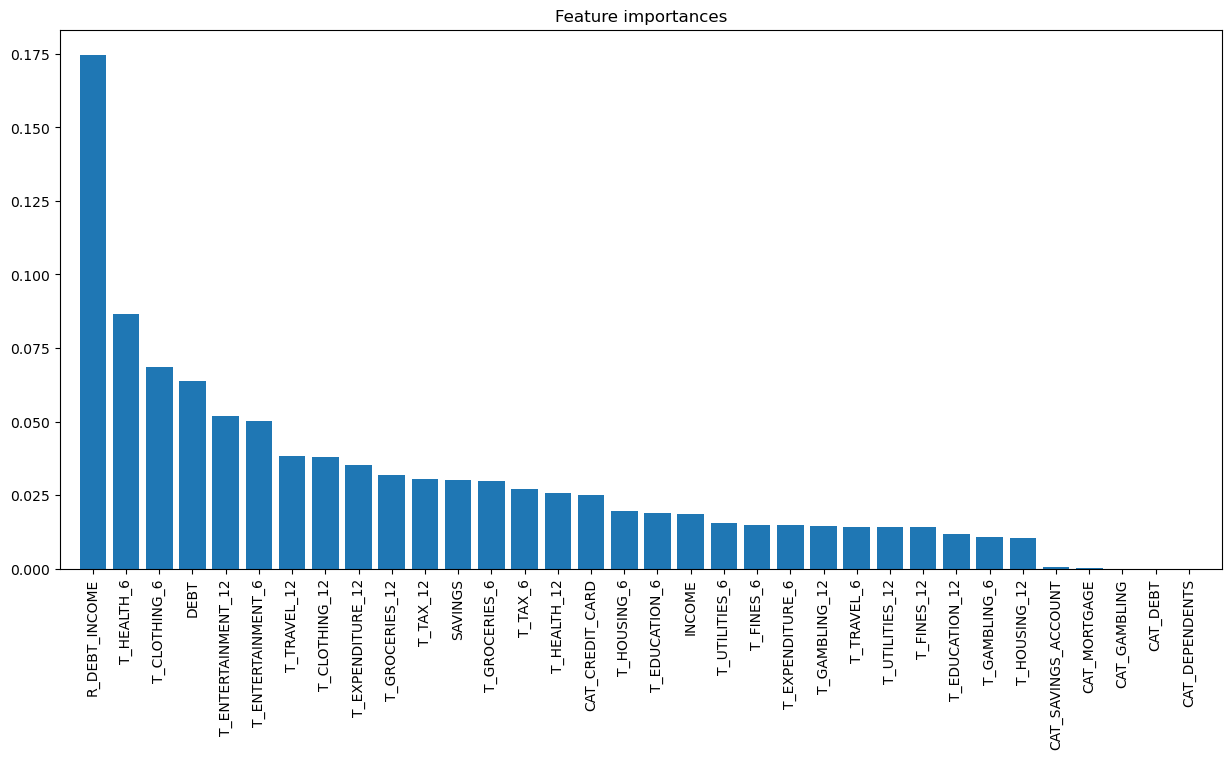

In [171]:
# gradient boosting hyperparameter tuning
# feature importance
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

<AxesSubplot: >

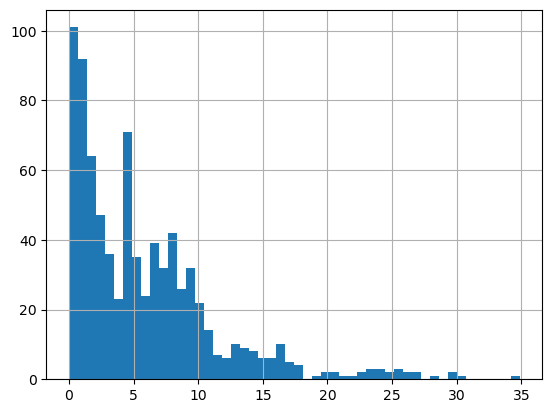

In [165]:
data['R_DEBT_INCOME'].hist(bins=50)

<AxesSubplot: >

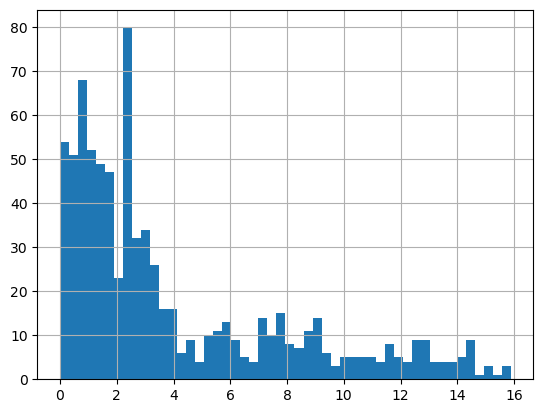

In [166]:
data['R_SAVINGS_INCOME'].hist(bins=50)